In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import dataframe_image as dfi

In [3]:
wildfires_df = pd.read_csv("../data/uncleaned_wildfires_G.csv", encoding="utf-8")

In [4]:
wildfires_df2 = wildfires_df[[ 
    "FIRE_NAME", "FIRE_YEAR", "DISCOVERY_DATE", "CONT_DATE", "NWCG_CAUSE_CLASSIFICATION", 
    "NWCG_GENERAL_CAUSE", "FIRE_SIZE", "LATITUDE", "LONGITUDE", "OWNER_DESCR", "STATE", "FIPS_NAME"]]


In [5]:
wildfires_df3 = wildfires_df2.dropna(how='any')

In [6]:
wildfires_clean = wildfires_df3.rename(columns={
    "FIRE_NAME":"Fire_Name", 
    "FIRE_YEAR":"Year",
    "DISCOVERY_DATE":"Fire_Discovery_Date",
    "CONT_DATE":"Date_Contained",
    "NWCG_CAUSE_CLASSIFICATION":"NWCG_Cause_Classification",
    "NWCG_GENERAL_CAUSE":"Cause_Description",
    "FIRE_SIZE":"Fire_Size",
    "LATITUDE":"Latitude",
    "LONGITUDE":"Longitude",
    "OWNER_DESCR":"Fire_Origin_Land_Owner",
    "STATE":"State",
    "FIPS_NAME":"County"
})
wildfires_clean["County"] = wildfires_clean["County"].str.replace("County","")

In [7]:
wildfires_clean = wildfires_clean.drop(
    wildfires_clean[wildfires_clean[
        "Cause_Description"] == "Missing data/not specified/undetermined"].index)

wildfires_clean = wildfires_clean.drop(wildfires_clean[wildfires_clean["Year"] < 2000].index)

wildfires_clean["Cause_Description"] = wildfires_clean[
    "Cause_Description"].replace("/", " ", regex=True)
    
wildfires_clean.head()

,Fire_Name,Year,Fire_Discovery_Date,Date_Contained,NWCG_Cause_Classification,Cause_Description,Fire_Size,Latitude,Longitude,Fire_Origin_Land_Owner,State,County
0,POWER,2004,10/6/2004,10/21/2004,Human,Equipment and vehicle use,16823.0,38.523333,-120.211667,USFS,CA,Amador
1,FREDS,2004,10/13/2004,10/17/2004,Human,Power generation transmission distribution,7700.0,38.780000,-120.260000,USFS,CA,El Dorado
2,THREE,2005,6/21/2005,6/29/2005,Natural,Natural,16100.0,33.723333,-111.275000,USFS,AZ,Gila
3,FORK,2005,5/29/2005,8/29/2005,Natural,Natural,11936.0,33.613333,-108.558889,USFS,NM,Catron
5,RUNNING LAKE,2005,8/10/2005,9/30/2005,Natural,Natural,7404.0,45.923333,-115.025000,USFS,ID,Idaho


In [8]:
# dfi.export(wildfires_clean.head(5), "wildfires_df.png")

In [9]:
wildfires_clean["Cause_Description"].unique()

array(['Equipment and vehicle use',
       'Power generation transmission distribution', 'Natural',
       'Debris and open burning', 'Smoking', 'Recreation and ceremony',
       'Arson incendiarism', 'Fireworks', 'Misuse of fire by a minor',
       'Other causes', 'Railroad operations and maintenance',
       'Firearms and explosives use'], dtype=object)

In [10]:
wildfires_clean.dtypes

Fire_Name                     object
Year                           int64
Fire_Discovery_Date           object
Date_Contained                object
NWCG_Cause_Classification     object
Cause_Description             object
Fire_Size                    float64
Latitude                     float64
Longitude                    float64
Fire_Origin_Land_Owner        object
State                         object
County                        object
dtype: object

In [11]:
wildfires_clean["Fire_Discovery_Date"] = pd.to_datetime(wildfires_clean["Fire_Discovery_Date"])
wildfires_clean["Date_Contained"] = pd.to_datetime(wildfires_clean["Date_Contained"])
wildfires_clean.head()

,Fire_Name,Year,Fire_Discovery_Date,Date_Contained,NWCG_Cause_Classification,Cause_Description,Fire_Size,Latitude,Longitude,Fire_Origin_Land_Owner,State,County
0,POWER,2004,2004-10-06,2004-10-21,Human,Equipment and vehicle use,16823.0,38.523333,-120.211667,USFS,CA,Amador
1,FREDS,2004,2004-10-13,2004-10-17,Human,Power generation transmission distribution,7700.0,38.780000,-120.260000,USFS,CA,El Dorado
2,THREE,2005,2005-06-21,2005-06-29,Natural,Natural,16100.0,33.723333,-111.275000,USFS,AZ,Gila
3,FORK,2005,2005-05-29,2005-08-29,Natural,Natural,11936.0,33.613333,-108.558889,USFS,NM,Catron
5,RUNNING LAKE,2005,2005-08-10,2005-09-30,Natural,Natural,7404.0,45.923333,-115.025000,USFS,ID,Idaho


In [12]:
wildfires_clean.dtypes

Fire_Name                            object
Year                                  int64
Fire_Discovery_Date          datetime64[ns]
Date_Contained               datetime64[ns]
NWCG_Cause_Classification            object
Cause_Description                    object
Fire_Size                           float64
Latitude                            float64
Longitude                           float64
Fire_Origin_Land_Owner               object
State                                object
County                               object
dtype: object

## Human vs. Natural Wildfires (size G)

In [13]:
humanNatural_df = wildfires_clean[["NWCG_Cause_Classification", "Cause_Description"]]
humanNatural_df = humanNatural_df.value_counts().to_frame("Total_Occurences").reset_index()
humanNatural_df
human_df = humanNatural_df[humanNatural_df['Cause_Description'] != 'Natural']
human_df

,NWCG_Cause_Classification,Cause_Description,Total_Occurences
1,Human,Equipment and vehicle use,167
2,Human,Power generation transmission distribution,73
3,Human,Recreation and ceremony,65
4,Human,Debris and open burning,58
5,Human,Arson incendiarism,53
6,Human,Firearms and explosives use,18
7,Human,Fireworks,9
8,Human,Other causes,9
9,Human,Railroad operations and maintenance,9
10,Human,Smoking,8


In [14]:
# dfi.export(human_df, 'humanFires_df.png')

C:\Users\Emily\AppData\Local\Temp\ipykernel_23768\4250661535.py:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(human_df['Total_Occurences'], labels=human_df['Cause_Description'],loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


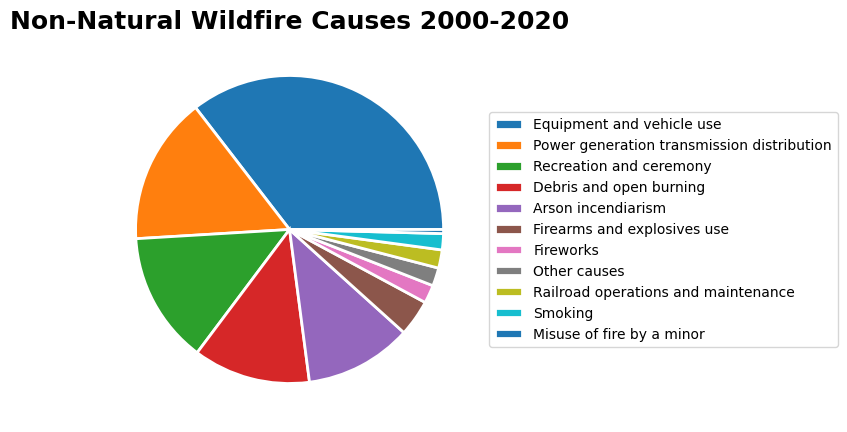

In [15]:
plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect='equal'))
plt.pie(human_df['Total_Occurences'], wedgeprops={'linewidth':2.0, 'edgecolor':'white'},)
plt.legend(human_df['Total_Occurences'], labels=human_df['Cause_Description'],loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Non-Natural Wildfire Causes 2000-2020", weight='bold', size=18)
plt.show()
# plt.savefig("non-natural_causes.png")

## Number of wildfires (size G) recorded per year

In [16]:
fireNumbers_df = wildfires_clean.assign(fire_count=wildfires_clean['Year'].map(wildfires_clean['Year'].value_counts()))
fireNumbers_df = fireNumbers_df[["Year", "fire_count"]]

fireNumbers_df.head()


,Year,fire_count
0,2004,28
1,2004,28
2,2005,91
3,2005,91
5,2005,91


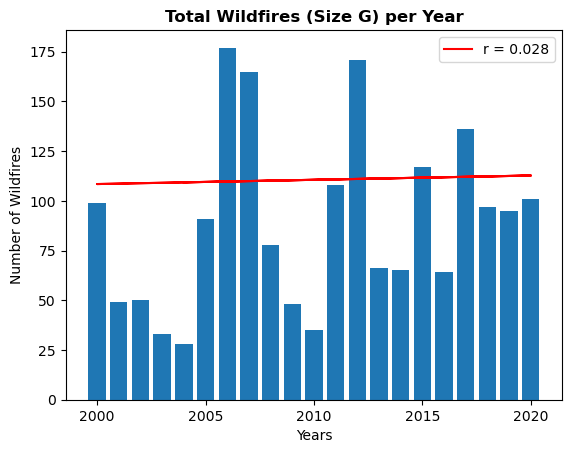

In [17]:

d_slope, d_int, d_r, d_p, d_std_err = st.linregress(
    fireNumbers_df["Year"], fireNumbers_df["fire_count"])
d_fit = d_slope * fireNumbers_df["Year"] + d_int

plt.bar(
    fireNumbers_df["Year"], fireNumbers_df["fire_count"],  align='center')
plt.xlabel("Years")
plt.ylabel("Number of Wildfires")
plt.title(f"Total Wildfires (Size G) per Year", weight='bold', size=12)
plt.plot(fireNumbers_df["Year"], d_fit, color='r', label=f'r = {d_r:.3f}')
plt.legend(loc='upper right')
plt.show()

# plt.savefig('yearly_fire_total.png')

## Amount of time to contain fires 

In [18]:
containment_df = wildfires_clean
containment_df["Days_to_Contain"] = containment_df[
    "Date_Contained"] - containment_df["Fire_Discovery_Date"]
containment_df = containment_df[[
    "Fire_Name", "Year", "Fire_Discovery_Date", "Date_Contained", 
    "Days_to_Contain", "Fire_Size", "NWCG_Cause_Classification", 
    "Cause_Description", "State"]]

containment_df = containment_df.sort_values(["Days_to_Contain"], ascending=False)

containmentDays_df = containment_df.drop(containment_df[containment_df["Days_to_Contain"] == "0 days"].index)
containmentDays_df.head()

,Fire_Name,Year,Fire_Discovery_Date,Date_Contained,Days_to_Contain,Fire_Size,NWCG_Cause_Classification,Cause_Description,State
4246,BUZZARD,2018,2018-05-22,2019-05-21,364 days,50296.0,Human,Recreation and ceremony,NM
3954,HAYDEN PASS,2016,2016-07-08,2017-06-19,346 days,16562.0,Natural,Natural,CO
3783,JUNKINS,2016,2016-10-17,2017-06-15,241 days,18320.0,Human,Power generation transmission distribution,CO
4478,SWAN LAKE,2019,2019-06-05,2019-12-05,183 days,167182.9,Natural,Natural,AK
184,CARIBOU,2008,2008-06-22,2008-12-16,177 days,13116.0,Natural,Natural,CA


In [19]:
containmentDays_df["Days_to_Contain"].value_counts()

4 days      114
2 days      109
3 days      103
1 days       91
5 days       87
           ... 
115 days      1
110 days      1
97 days       1
346 days      1
364 days      1
Name: Days_to_Contain, Length: 149, dtype: int64

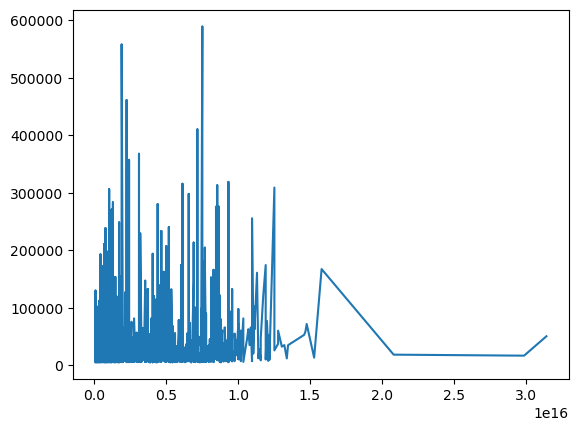

In [20]:
plt.plot(containmentDays_df["Days_to_Contain"], containmentDays_df["Fire_Size"])


In [21]:
sameDay_df = containment_df.loc[containment_df['Days_to_Contain'] == '0 days']
sameDay_df.head()


,Fire_Name,Year,Fire_Discovery_Date,Date_Contained,Days_to_Contain,Fire_Size,NWCG_Cause_Classification,Cause_Description,State
2164,LEVI,2006,2006-05-20,2006-05-20,0 days,8992.0,Natural,Natural,NM
2178,SIX,2007,2007-11-18,2007-11-18,0 days,18000.0,Human,Equipment and vehicle use,NM
2491,MIDWAY,2006,2006-07-11,2006-07-11,0 days,6400.0,Human,Equipment and vehicle use,CA
3993,BYRD,2016,2016-07-26,2016-07-26,0 days,5500.0,Natural,Natural,NM
2175,JET,2006,2006-05-21,2006-05-21,0 days,11000.0,Natural,Natural,NM


In [22]:
top5_df = wildfires_clean.loc[wildfires_clean["Fire_Size"] > 360000]
top5_df

,Fire_Name,Year,Fire_Discovery_Date,Date_Contained,NWCG_Cause_Classification,Cause_Description,Fire_Size,Latitude,Longitude,Fire_Origin_Land_Owner,State,County,Days_to_Contain
2400,MURPHY COMPLEX,2007,2007-07-21,2007-08-26,Natural,Natural,367785.0,42.036900,-115.108900,BLM,ID,Owyhee,36 days
3121,HOLLOWAY,2012,2012-08-05,2012-08-31,Natural,Natural,461047.0,41.973300,-118.365000,BLM,OR,Harney,26 days
3134,LONG DRAW,2012,2012-07-08,2012-07-30,Natural,Natural,558198.3,42.391894,-117.893687,BLM,OR,Malheur,22 days
4304,RANCH,2018,2018-07-28,2018-10-19,Human,Equipment and vehicle use,410203.0,39.238889,-123.108611,PRIVATE,CA,Mendocino,83 days
4635,DOE,2020,2020-08-16,2020-11-11,Natural,Natural,589368.0,39.765255,-122.672914,USFS,CA,Glenn,87 days


In [23]:
wildfires_clean["State"].value_counts()

ID    263
NV    221
CA    204
OR    187
MT    128
AK    122
NM    120
AZ    113
UT    107
TX    101
WA     77
WY     66
FL     57
CO     48
NC     10
NE      7
OK      6
GA      5
LA      5
VA      4
KS      4
MI      4
SD      4
SC      2
MN      2
AR      2
HI      2
KY      1
PA      1
Name: State, dtype: int64

In [24]:
# mostStates_df = wildfires_clean.loc[(wildfires_clean["State"]== "ID") | (wildfires_clean["State"] == "NV")]
stateNumbers_df = wildfires_clean.assign(state_count=wildfires_clean['State'].map(wildfires_clean['State'].value_counts()))
stateNumbers_df = stateNumbers_df[["Year", "State", "state_count"]]
stateNumbers_df

,Year,State,state_count
0,2004,CA,204
1,2004,CA,204
2,2005,AZ,113
3,2005,NM,120
5,2005,ID,263
...,...,...,...
4772,2020,ID,263
4773,2020,ID,263
4776,2020,FL,57
4777,2020,FL,57


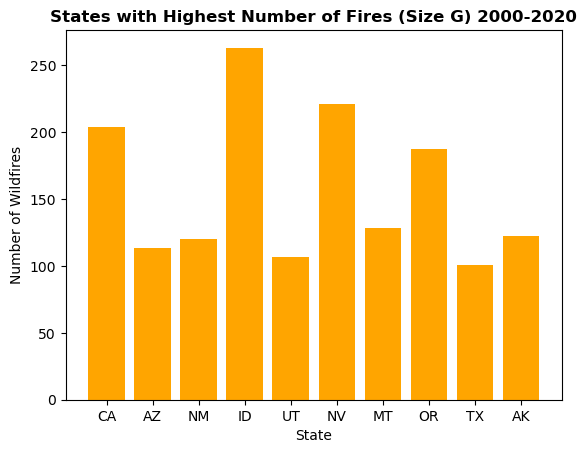

In [25]:
states = stateNumbers_df.loc[stateNumbers_df["state_count"] > 80]


plt.bar(
    states["State"], states['state_count'],  align='center', color='orange')
plt.xlabel("State")
plt.ylabel("Number of Wildfires")
plt.title(f"States with Highest Number of Fires (Size G) 2000-2020", weight='bold', size=12)


plt.show()

# plt.savefig('top_ten_states.png')

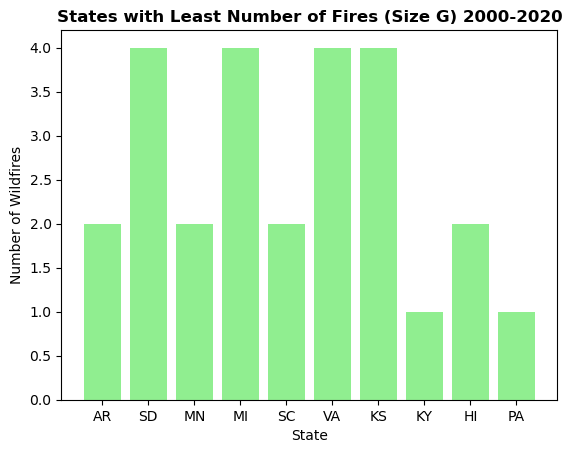

In [26]:
states_least = stateNumbers_df.loc[stateNumbers_df["state_count"] < 5]


plt.bar(
    states_least["State"], states_least['state_count'],  align='center', color='lightgreen')
plt.xlabel("State")
plt.ylabel("Number of Wildfires")
plt.title(f"States with Least Number of Fires (Size G) 2000-2020", weight='bold', size=12)


plt.show()

# plt.savefig('bottom_ten_states.png')

## States with most/least acres burned 2000-2020

In [37]:
acresBurned_df = wildfires_clean.groupby(["State"])["Fire_Size"].sum().reset_index()
acresBurned_df.sort_values(by=["Fire_Size"])

,State,Fire_Size
10,KY,7400.00
21,PA,7949.20
1,AR,13385.00
7,HI,13458.00
22,SC,29753.00
11,LA,39277.00
12,MI,40673.00
23,SD,42709.60
26,VA,45415.00
19,OK,48421.00


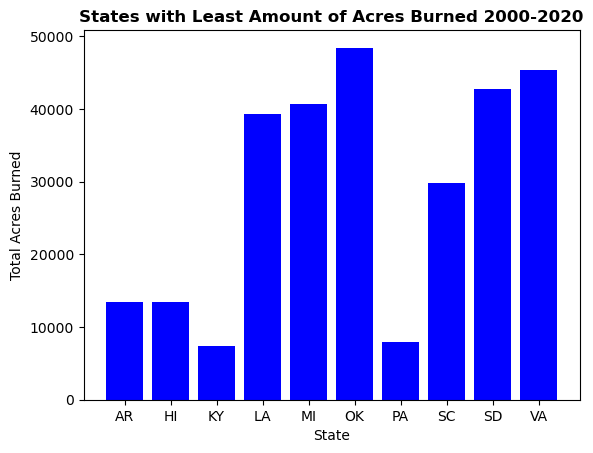

In [49]:
bottomTenAcres_df = acresBurned_df.loc[acresBurned_df["Fire_Size"] < 50000]

plt.bar(
    bottomTenAcres_df["State"], bottomTenAcres_df['Fire_Size'],  align='center', color='blue')
plt.xlabel("State")
plt.ylabel("Total Acres Burned")
plt.title(f"States with Least Amount of Acres Burned 2000-2020", weight='bold', size=12)


plt.show()

# plt.savefig('bottom_ten_acres.png')

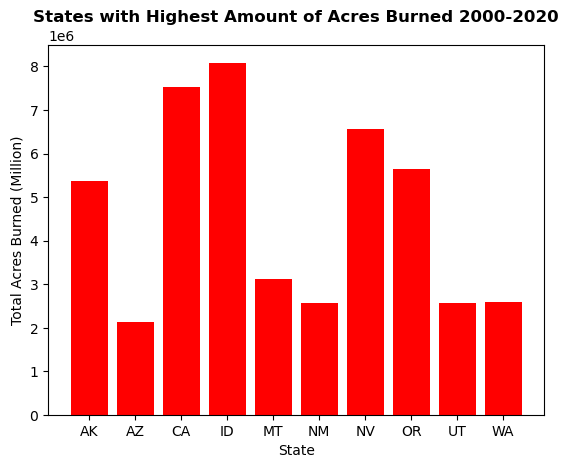

In [48]:
topTenAcres_df = acresBurned_df.loc[acresBurned_df["Fire_Size"] > 2120000]


plt.bar(
    topTenAcres_df["State"], topTenAcres_df['Fire_Size'],  align='center', color='red')
plt.xlabel("State")
plt.ylabel("Total Acres Burned (Million)")
plt.title(f"States with Highest Amount of Acres Burned 2000-2020", weight='bold', size=12)


plt.show()

# plt.savefig('top_ten_acres.png')